In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df = spark.read.csv("creditcard.csv", header=True)

Cast all columns to float type (from string type), and cache the dataframe in memory.

In [77]:
colnames = [col.name for col in df.schema.fields]
for col in colnames:
    df = df.withColumn(col, df[col].cast("float"))
    
df.persist()  

DataFrame[Time: float, V1: float, V2: float, V3: float, V4: float, V5: float, V6: float, V7: float, V8: float, V9: float, V10: float, V11: float, V12: float, V13: float, V14: float, V15: float, V16: float, V17: float, V18: float, V19: float, V20: float, V21: float, V22: float, V23: float, V24: float, V25: float, V26: float, V27: float, V28: float, Amount: float, Class: float]

We will do all the computational heavy-lifting in spark, and store the result as pandas dataframes for visualization.

Number of rows:

In [3]:
df.count()

284807

Number of columns:

In [4]:
len(df.schema)

31

Take a look at the schema of the columns

In [5]:
df.printSchema()

root
 |-- Time: float (nullable = true)
 |-- V1: float (nullable = true)
 |-- V2: float (nullable = true)
 |-- V3: float (nullable = true)
 |-- V4: float (nullable = true)
 |-- V5: float (nullable = true)
 |-- V6: float (nullable = true)
 |-- V7: float (nullable = true)
 |-- V8: float (nullable = true)
 |-- V9: float (nullable = true)
 |-- V10: float (nullable = true)
 |-- V11: float (nullable = true)
 |-- V12: float (nullable = true)
 |-- V13: float (nullable = true)
 |-- V14: float (nullable = true)
 |-- V15: float (nullable = true)
 |-- V16: float (nullable = true)
 |-- V17: float (nullable = true)
 |-- V18: float (nullable = true)
 |-- V19: float (nullable = true)
 |-- V20: float (nullable = true)
 |-- V21: float (nullable = true)
 |-- V22: float (nullable = true)
 |-- V23: float (nullable = true)
 |-- V24: float (nullable = true)
 |-- V25: float (nullable = true)
 |-- V26: float (nullable = true)
 |-- V27: float (nullable = true)
 |-- V28: float (nullable = true)
 |-- Amount: floa

Summary statistics of columns:

In [6]:
info = df.describe().toPandas()
info = info.set_index("summary")
info.index.name = None
info = info.applymap(np.float)
info = info.T
info

,count,mean,stddev,min,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,172792.000000
V1,284807.0,-2.237832e-10,1.958696,-56.407510,2.454930
V2,284807.0,5.639038e-11,1.651309,-72.715730,22.057730
V3,284807.0,5.718177e-11,1.516255,-48.325590,9.382559
V4,284807.0,-5.515661e-11,1.415869,-5.683171,16.875343
V5,284807.0,2.642806e-11,1.380247,-113.743310,34.801666
V6,284807.0,-1.983622e-10,1.332271,-26.160505,73.301630
V7,284807.0,-1.104466e-10,1.237094,-43.557243,120.589490
V8,284807.0,5.347500e-11,1.194353,-73.216720,20.007208
V9,284807.0,2.419927e-11,1.098632,-13.434067,15.594995


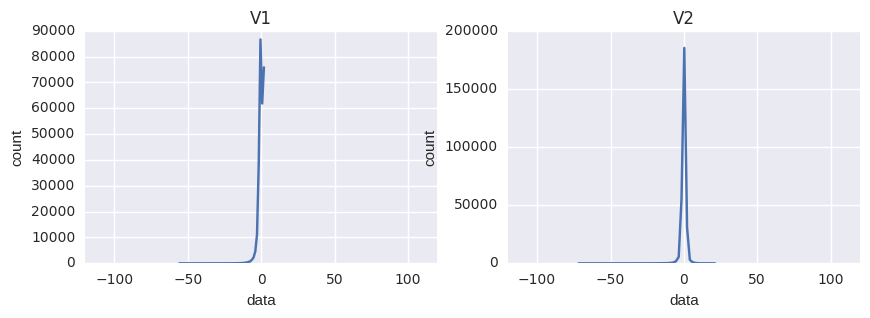

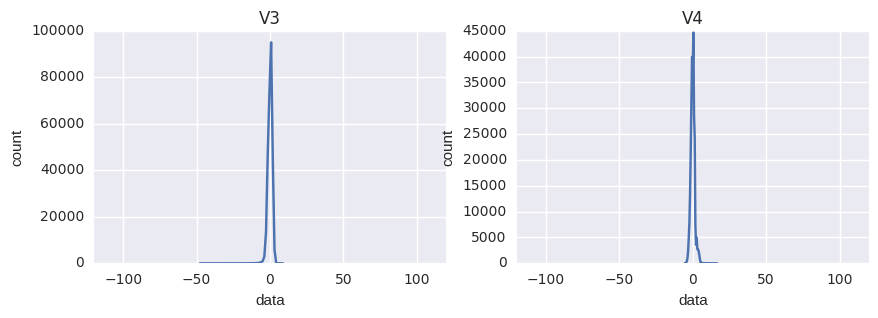

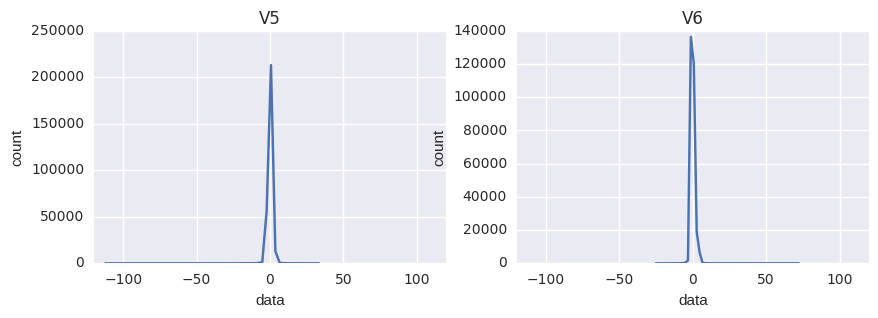

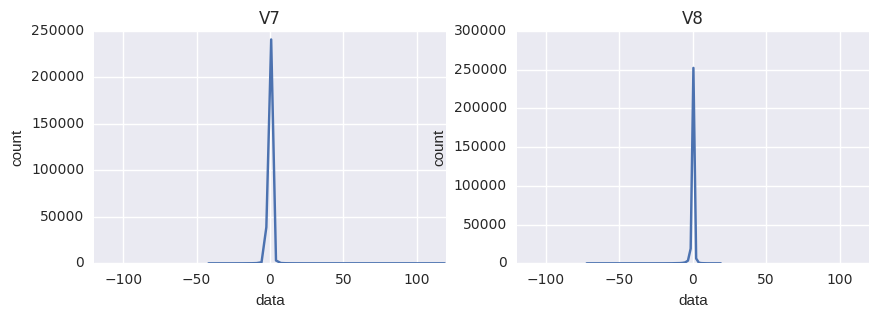

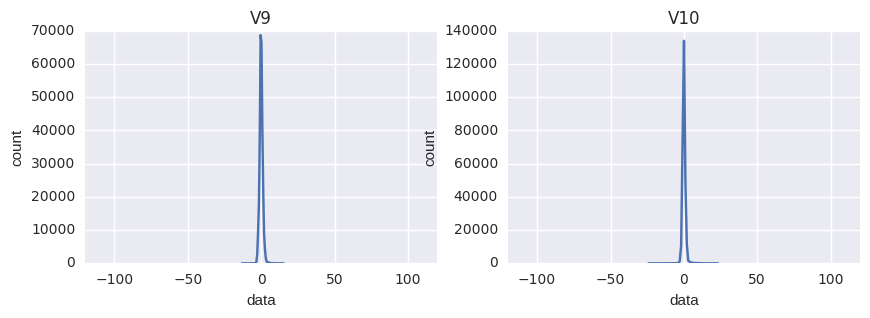

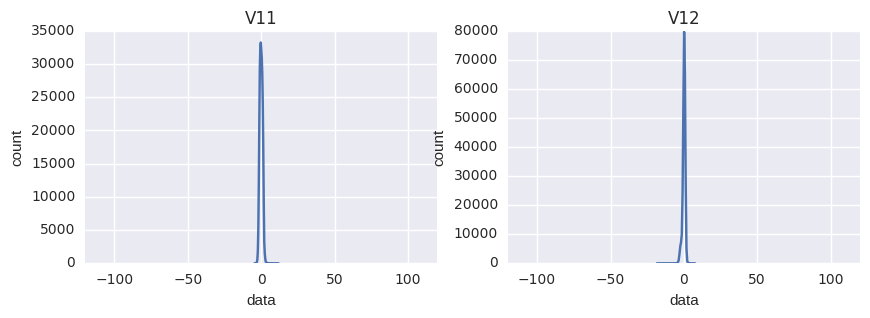

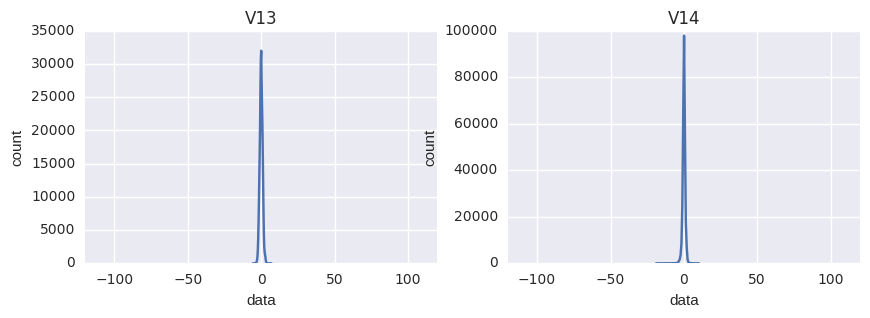

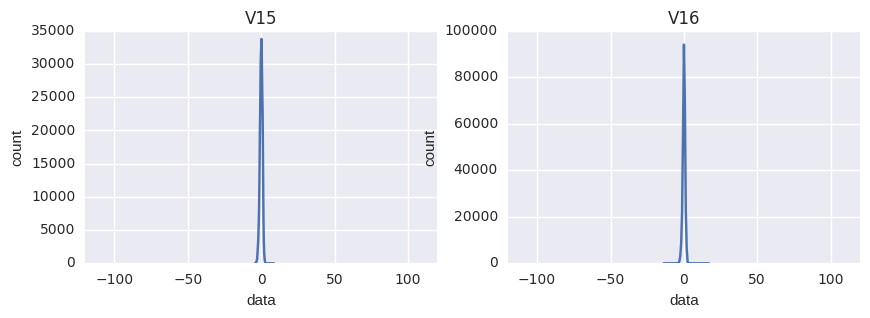

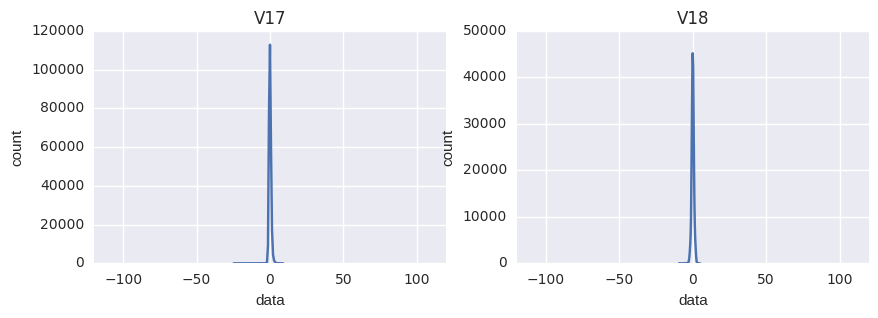

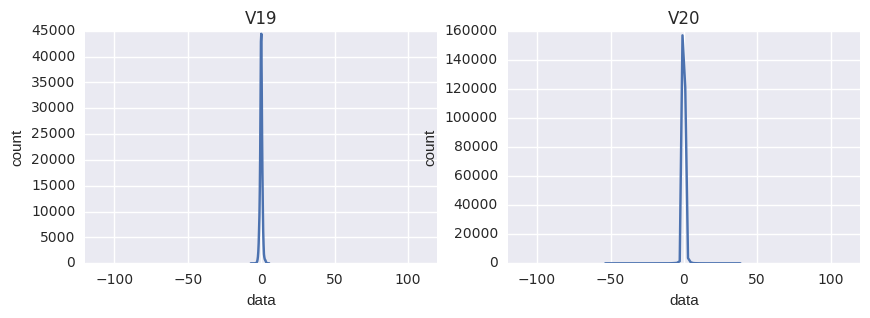

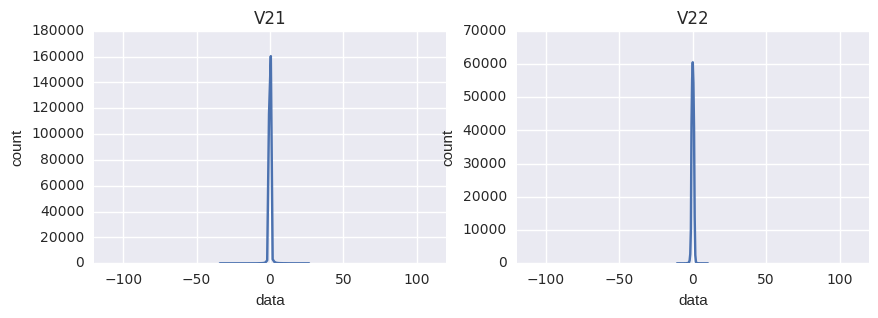

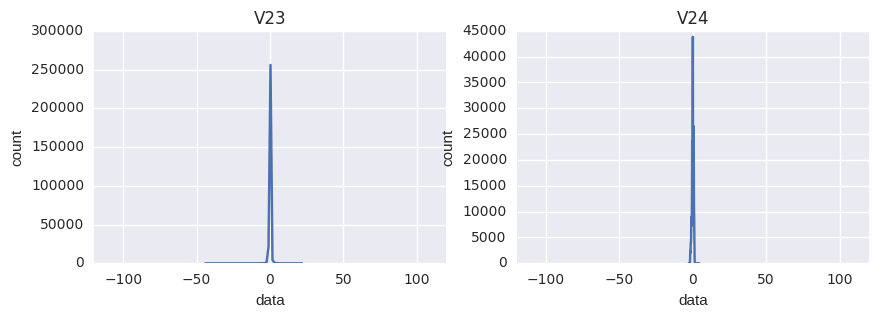

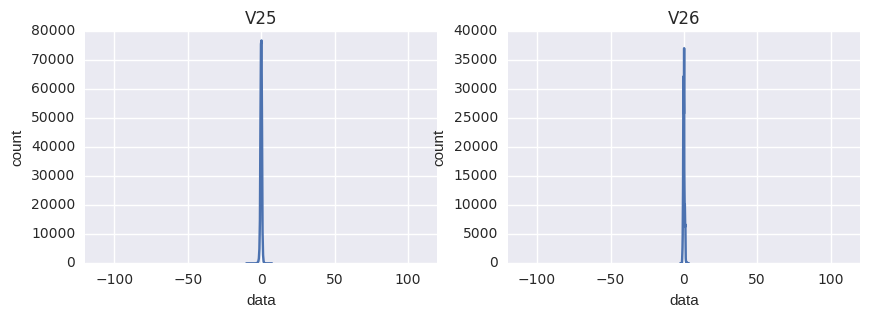

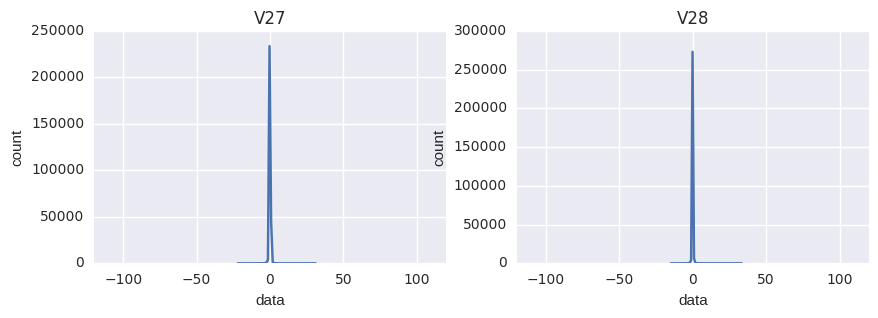

In [9]:


pylab.rcParams['figure.figsize'] = 10, 3
index = iter(range(28))   
for i in range(14):

    fig, ax = plt.subplots(nrows=1, ncols=2)
    
    for j in range(2):
        which = str(next(index) + 1)
        rdd = df.select("V" + which).rdd.map(lambda x: x[0])
        x, y = rdd.histogram(50)
        x = np.array(x)
        x = (x[1:] + x[:-1]) / 2
        ax[j].plot(x, y)
#        mean = train["loss"].groupby(train.ix[:, next(index)]).mean()
#        mean = mean.sort_values()
#        mean.plot(kind="bar", color="b", alpha=0.7, ax=ax[j])
        ax[j].set_title("V" + which)
        ax[j].set_xlabel("data")
        ax[j].set_ylabel("count")
        ax[j].set_xlim([-120., 120.])
plt.show()

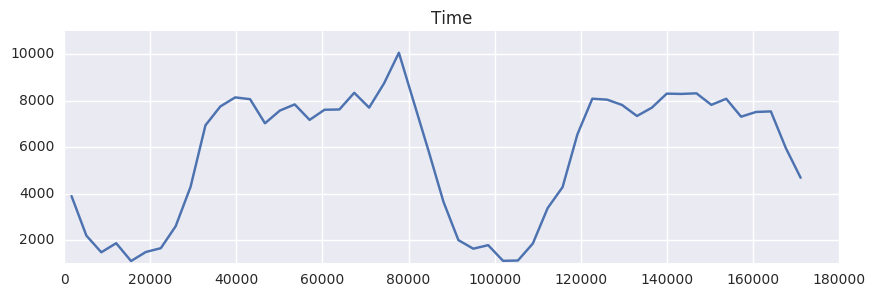

In [25]:
rdd = df.select("Time").rdd.map(lambda x: x[0])
x, y = rdd.histogram(50)
x = np.array(x)
x = (x[1:] + x[:-1]) / 2
plt.plot(x, y)
plt.title("Time")
plt.show()

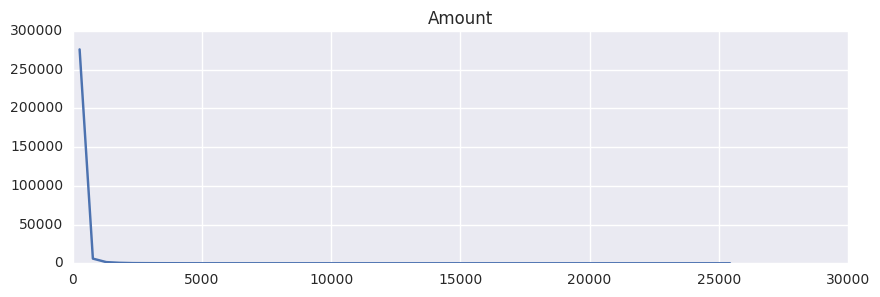

In [26]:
rdd = df.select("Amount").rdd.map(lambda x: x[0])
x, y = rdd.histogram(50)
x = np.array(x)
x = (x[1:] + x[:-1]) / 2
plt.plot(x, y)
plt.title("Amount")
plt.show()

In [51]:
colnames

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [78]:
import bisect
from pyspark.sql.functions import udf

pylab.rcParams['figure.figsize'] = 10, 3
colnames_iter = iter(colnames[:2])   

for i in range(1):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    for j in range(2):
        colname = next(colnames_iter)
        print colname
        df.registerTempTable("Table")
        bounds = np.array([spark.sql("SELECT PERCENTILE(%s, %f) FROM Table" % (colname, p)).collect()[0][0]
                       for p in np.linspace(0.0, 1.0, 11)])
    
        binner = udf(lambda v: bisect.bisect(bounds, v)
                 if bisect.bisect(bounds, v) <= 10 else 10, IntegerType())
    
        df.withColumn("group_label", binner(df[colname])).registerTempTable("New_table")
        pd_df = spark.sql("SELECT group_label, AVG(CLASS) AS mean FROM New_table GROUP BY group_label").toPandas()
        pd_df = pd_df.set_index("group_label").sort_index()

        pd_df.plot(kind="bar", ax=ax[j])
        ax[j].set_title(colname)
        ax[j].set_ylabel("Avg target")
    
        
        
        
#for colname in colnames[:1]:
#    print colname
#    df.registerTempTable("Table")
#    bounds = np.array([spark.sql("SELECT PERCENTILE(%s, %f) FROM Table" % (colname, p)).collect()[0][0]
#                       for p in np.linspace(0.0, 1.0, 11)])
    
#    binner = udf(lambda v: bisect.bisect(bounds, v)
#                 if bisect.bisect(bounds, v) <= 10 else 10, IntegerType())
    
#    df.withColumn("group_label", binner(df[colname])).registerTempTable("New_table")
#    pd_df = spark.sql("SELECT group_label, AVG(CLASS) AS mean FROM New_table GROUP BY group_label").toPandas()
#    pd_df = pd_df.set_index("group_label").sort_index()
#    r.append((colname, pd_df))

Time
V1


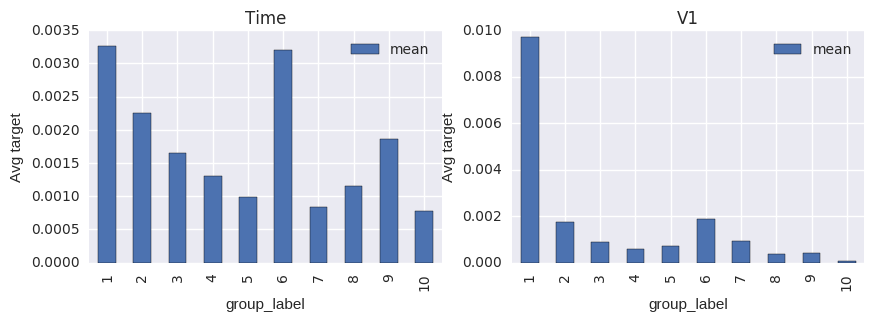

In [79]:
plt.show()

In [73]:
r[0][1].plot(kind="bar")

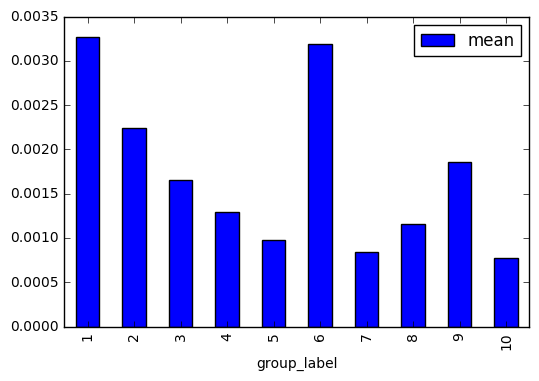

In [74]:
import matplotlib.pyplot as plt

plt.show()

In [65]:
r[0][1].set_index("group_label").sort_index()["count"].sum()

284807

In [5]:
df.registerTempTable("Table")

In [6]:
bounds = np.array([spark.sql("SELECT PERCENTILE(V1, %f) FROM Table" % p).collect()[0][0]
                  for p in np.linspace(0.0, 1.0, 11)])    

In [7]:
import bisect

In [8]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

binner = udf(lambda v: bisect.bisect(bounds, v) if bisect.bisect(bounds, v) <= 10 else 10, IntegerType())

In [10]:
a = df.groupBy(binner(df["V1"])).agg({"Class": "mean", "V1": "count"})

In [39]:
sorted(a.collect())

[Row(<lambda>(V1)=1, avg(Class)=0.009690670973631544, count(V1)=28481),
 Row(<lambda>(V1)=2, avg(Class)=0.0017555563358028158, count(V1)=28481),
 Row(<lambda>(V1)=3, avg(Class)=0.0008778089887640449, count(V1)=28480),
 Row(<lambda>(V1)=4, avg(Class)=0.0005968891541729574, count(V1)=28481),
 Row(<lambda>(V1)=5, avg(Class)=0.0007022471910112359, count(V1)=28480),
 Row(<lambda>(V1)=6, avg(Class)=0.0018608897159509848, count(V1)=28481),
 Row(<lambda>(V1)=7, avg(Class)=0.0009480004213335205, count(V1)=28481),
 Row(<lambda>(V1)=8, avg(Class)=0.00035112359550561797, count(V1)=28480),
 Row(<lambda>(V1)=9, avg(Class)=0.0004213335205926758, count(V1)=28481),
 Row(<lambda>(V1)=10, avg(Class)=7.022225343211264e-05, count(V1)=28481)]

In [22]:
b = a.select(["count(V1)"]).rdd.map(lambda x: x[0]).collect()

In [24]:
sum(b)

284807

In [34]:
from pyspark.sql.functions import avg, count

In [36]:
sorted(df.groupBy(binner(df["V1"]).alias("group_label")).agg( avg(df["Class"]).alias("mean")).collect())

[Row(group_label=1, mean=0.009690670973631544),
 Row(group_label=2, mean=0.0017555563358028158),
 Row(group_label=3, mean=0.0008778089887640449),
 Row(group_label=4, mean=0.0005968891541729574),
 Row(group_label=5, mean=0.0007022471910112359),
 Row(group_label=6, mean=0.0018608897159509848),
 Row(group_label=7, mean=0.0009480004213335205),
 Row(group_label=8, mean=0.00035112359550561797),
 Row(group_label=9, mean=0.0004213335205926758),
 Row(group_label=10, mean=7.022225343211264e-05)]

In [38]:
sorted(df.groupBy(binner(df["V1"]).alias("group_label")).agg(count(df["V1"]).alias("count") ).collect())

[Row(group_label=1, count=28481),
 Row(group_label=2, count=28481),
 Row(group_label=3, count=28480),
 Row(group_label=4, count=28481),
 Row(group_label=5, count=28480),
 Row(group_label=6, count=28481),
 Row(group_label=7, count=28481),
 Row(group_label=8, count=28480),
 Row(group_label=9, count=28481),
 Row(group_label=10, count=28481)]

In [41]:
ndf = df.withColumn("group_label", binner(df["V1"]))

In [49]:
ndf.registerTempTable("Table")

sorted(spark.sql("SELECT group_label, COUNT(CLASS) AS count, AVG(CLASS) AS mean FROM Table GROUP BY group_label").collect())

[Row(group_label=1, count=28481, mean=0.009690670973631544),
 Row(group_label=2, count=28481, mean=0.0017555563358028158),
 Row(group_label=3, count=28480, mean=0.0008778089887640449),
 Row(group_label=4, count=28481, mean=0.0005968891541729574),
 Row(group_label=5, count=28480, mean=0.0007022471910112359),
 Row(group_label=6, count=28481, mean=0.0018608897159509848),
 Row(group_label=7, count=28481, mean=0.0009480004213335205),
 Row(group_label=8, count=28480, mean=0.00035112359550561797),
 Row(group_label=9, count=28481, mean=0.0004213335205926758),
 Row(group_label=10, count=28481, mean=7.022225343211264e-05)]

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

In [2]:
cc = pd.read_csv("creditcard.csv")

In [3]:
X = cc.values[:, :-1]
y = cc.values[:, -1]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X.mean(axis=0)

array([  9.48138596e+04,   1.16597995e-15,   3.41690805e-16,
        -1.37314996e-15,   2.08686861e-15,   9.60406632e-16,
         1.49010721e-15,  -5.55646730e-16,   1.17755593e-16,
        -2.40645529e-15,   2.23975129e-15,   1.67332693e-15,
        -1.25499520e-15,   8.17603027e-16,   1.20629628e-15,
         4.91300284e-15,   1.43766606e-15,  -3.80011269e-16,
         9.57213260e-16,   1.03981681e-15,   6.40670259e-16,
         1.65656173e-16,  -3.44485005e-16,   2.57864790e-16,
         4.47196822e-15,   5.34091469e-16,   1.68709835e-15,
        -3.66645261e-16,  -1.22040449e-16,   8.83496193e+01])

In [6]:
X.shape

(284807, 30)

In [7]:
y.mean(axis=0)

0.001727485630620034

In [11]:
pos_index = y==1
neg_index = y==0

In [12]:
pos_index.shape

(284807,)

In [13]:
neg_index.shape

(284807,)

In [15]:
X[pos_index].mean(axis=0)

array([  8.07468069e+04,  -4.77194844e+00,   3.62377810e+00,
        -7.03328105e+00,   4.54202910e+00,  -3.15122489e+00,
        -1.39773671e+00,  -5.56873108e+00,   5.70635895e-01,
        -2.58112292e+00,  -5.67688287e+00,   3.80017291e+00,
        -6.25939304e+00,  -1.09333817e-01,  -6.97172289e+00,
        -9.29287469e-02,  -4.13994570e+00,  -6.66583640e+00,
        -2.24630813e+00,   6.80659303e-01,   3.72319396e-01,
         7.13588353e-01,   1.40488821e-02,  -4.03079659e-02,
        -1.05130305e-01,   4.14488873e-02,   5.16481256e-02,
         1.70574792e-01,   7.56672906e-02,   1.22211321e+02])

In [17]:
X.std(axis=0)[0]

47488.062585499334

In [18]:
X.std(axis=0)[1]

1.9586923652174186

In [19]:
X.std(axis=0)[2]

1.6513056804786777

In [20]:
from sklearn.decomposition import PCA

In [23]:
X_pca = PCA(n_components=30).fit_transform(X)

In [24]:
X_pca[pos_index].mean(axis=0)

array([  1.40670545e+04,   3.30797886e+01,   5.19746749e+00,
         5.74050014e+00,   5.55998621e+00,   6.94191683e+00,
        -1.40837198e+00,   2.52940065e+00,   6.61164943e-01,
        -4.69700643e+00,   4.28647994e+00,   9.07689524e-01,
         3.39067114e+00,   8.98800924e+00,   2.79410136e+00,
        -1.11185394e+00,   7.10406553e-01,   4.69116334e+00,
         6.62528687e+00,  -4.15646429e-01,  -8.44089548e-01,
        -5.98782463e-01,  -1.97915361e-01,   1.29325075e-02,
        -1.06937749e-01,  -7.17778243e-03,  -5.44635012e-02,
         1.89824964e-01,   9.76557211e-02,  -1.38086494e-02])

In [25]:
X_pca = PCA(n_components=30).fit_transform(X_pca)

In [26]:
X_pca[pos_index].mean(axis=0)

array([  1.40670545e+04,   3.30797886e+01,   5.19746749e+00,
         5.74050014e+00,   5.55998621e+00,   6.94191683e+00,
        -1.40837198e+00,   2.52940065e+00,   6.61164943e-01,
        -4.69700643e+00,   4.28647994e+00,   9.07689524e-01,
         3.39067114e+00,   8.98800924e+00,   2.79410136e+00,
        -1.11185394e+00,   7.10406553e-01,   4.69116334e+00,
         6.62528687e+00,  -4.15646429e-01,  -8.44089548e-01,
        -5.98782463e-01,  -1.97915361e-01,   1.29325075e-02,
        -1.06937749e-01,  -7.17778243e-03,  -5.44635012e-02,
         1.89824964e-01,   9.76557211e-02,  -1.38086494e-02])

In [27]:
X_pca.shape

(284807, 30)